In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('earthquake_dataset.csv')

In [3]:
df = df.drop('Depth Category', axis=1)
df = df.drop('Earthquake Category', axis=1)

In [4]:
df.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Richter Category,Day Count
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019,micro,115
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911,micro,115
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412,micro,115
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014,micro,115
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312,minor,115


In [5]:
data = df
data.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Richter Category,Day Count
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019,micro,115
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911,micro,115
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412,micro,115
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014,micro,115
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312,minor,115


In [6]:
data = df.drop('Richter Category', axis=1)
data.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Day Count
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019,115
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911,115
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412,115
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014,115
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312,115


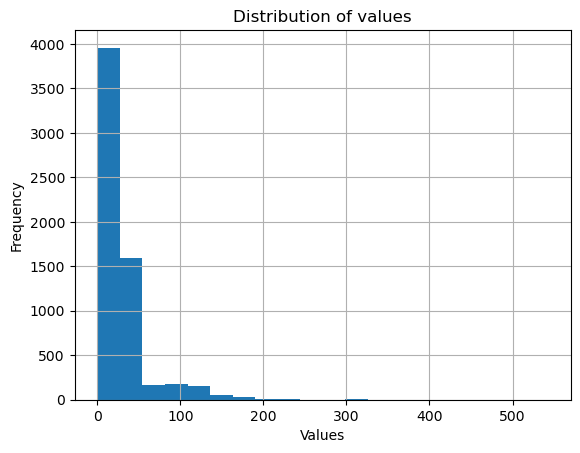

In [7]:
import matplotlib.pyplot as plt

data['Depth(km)'].hist(bins=20)  # Adjust bins as needed for better visualization
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of values')
plt.grid(True)
plt.show()

In [8]:
data['Depth(km)'].describe()

count    6170.000000
mean       28.091410
std        33.602533
min         0.000000
25%         9.000000
50%        22.000000
75%        32.000000
max       543.000000
Name: Depth(km), dtype: float64

We will use the 50% as our point of reference to differentiate shallow earthquakes and deep earthquakes

In [9]:
def getDepthCategory(magnitude):
    if (magnitude <= 22):
        return 0
    else:
        return 1

In [10]:
df['Depth Category'] = 0
df.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Richter Category,Day Count,Depth Category
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019,micro,115,0
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911,micro,115,0
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412,micro,115,0
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014,micro,115,0
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312,minor,115,0


In [11]:
for index, row in data.iterrows():
    data.loc[index, 'Depth Category'] = getDepthCategory(row['Depth(km)'])
data.head(23)

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Day Count,Depth Category
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019,115,0.0
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911,115,1.0
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412,115,0.0
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014,115,1.0
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312,115,1.0
5,25,4,1450,7.81,125.07,11,4.0,7,361,17,8714,115,0.0
6,25,4,1416,12.40,125.71,9,2.4,33,491,33,6821,115,0.0
7,25,4,1302,11.86,125.94,27,2.5,53,208,33,2801,115,1.0
8,25,4,2444,7.77,127.18,13,3.2,72,39,31,8204,115,0.0
9,25,4,2436,7.80,127.15,15,2.6,70,39,31,8204,115,0.0


In [12]:
def getRichter(magnitude):
    if (magnitude < 1.9):
        return 0
    elif (magnitude < 2.3):
        return 1
    elif (magnitude < 2.8):
        return 2
    else:
        return 3

In [13]:
data['Earthquake Category'] = 0
data.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Day Count,Depth Category,Earthquake Category
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019,115,0.0,0
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911,115,1.0,0
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412,115,0.0,0
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014,115,1.0,0
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312,115,1.0,0


In [14]:
for index, row in df.iterrows():
    data.loc[index, 'Earthquake Category'] = getRichter(row['Mag'])
data.head(23)

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Day Count,Depth Category,Earthquake Category
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019,115,0.0,2
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911,115,1.0,1
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412,115,0.0,2
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014,115,1.0,3
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312,115,1.0,3
5,25,4,1450,7.81,125.07,11,4.0,7,361,17,8714,115,0.0,3
6,25,4,1416,12.40,125.71,9,2.4,33,491,33,6821,115,0.0,2
7,25,4,1302,11.86,125.94,27,2.5,53,208,33,2801,115,1.0,2
8,25,4,2444,7.77,127.18,13,3.2,72,39,31,8204,115,0.0,3
9,25,4,2436,7.80,127.15,15,2.6,70,39,31,8204,115,0.0,2


In [15]:
print(data.shape)  #display the dataset dimension

(6170, 14)


In [16]:
data.dtypes  #display the data types

Day                      int64
Month                    int64
Time                     int64
Latitude(ÂºN)          float64
Longitude(ÂºE)         float64
Depth(km)                int64
Mag                    float64
Distance(km)             int64
City                     int64
Province                 int64
Zip Code                 int64
Day Count                int64
Depth Category         float64
Earthquake Category      int64
dtype: object

In [17]:
data.info()  #display the data structures

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6170 entries, 0 to 6169
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Day                  6170 non-null   int64  
 1   Month                6170 non-null   int64  
 2   Time                 6170 non-null   int64  
 3   Latitude(ÂºN)        6170 non-null   float64
 4   Longitude(ÂºE)       6170 non-null   float64
 5   Depth(km)            6170 non-null   int64  
 6   Mag                  6170 non-null   float64
 7   Distance(km)         6170 non-null   int64  
 8   City                 6170 non-null   int64  
 9   Province             6170 non-null   int64  
 10  Zip Code             6170 non-null   int64  
 11  Day Count            6170 non-null   int64  
 12  Depth Category       6170 non-null   float64
 13  Earthquake Category  6170 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 675.0 KB


In [18]:
data.describe().transpose()  #display the statistical info of dataset

,count,mean,std,min,25%,50%,75%,max
Day,6170.0,14.431767,8.563833,1.00,7.00,14.00,21.00,31.00
Month,6170.0,2.345543,1.111057,1.00,1.00,2.00,3.00,4.00
Time,6170.0,1230.412642,749.904752,100.00,511.25,1222.00,1932.00,2459.00
Latitude(ÂºN),6170.0,10.028420,3.620895,1.93,8.15,8.76,11.83,23.80
Longitude(ÂºE),6170.0,124.899381,2.371969,118.55,123.17,126.12,126.61,128.44
Depth(km),6170.0,28.091410,33.602533,0.00,9.00,22.00,32.00,543.00
Mag,6170.0,2.416224,0.711643,1.10,1.90,2.30,2.80,7.50
Distance(km),6170.0,37.751540,44.809418,0.00,11.00,23.00,51.00,472.00
City,6170.0,267.015883,142.661262,0.00,164.00,242.00,364.00,588.00
Province,6170.0,57.754619,26.932841,0.00,31.00,73.00,81.00,88.00


In [19]:
data.columns  #display the data columns

Index(['Day', 'Month', 'Time', 'Latitude(ÂºN)', 'Longitude(ÂºE)', 'Depth(km)',
       'Mag', 'Distance(km)', 'City', 'Province', 'Zip Code', 'Day Count',
       'Depth Category', 'Earthquake Category'],
      dtype='object')

Text(0, 0.5, 'Depth Category')

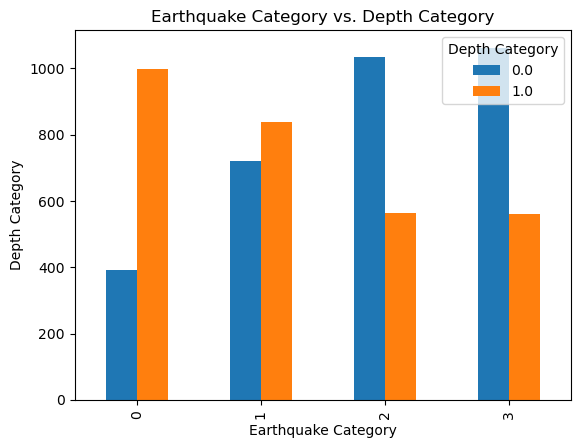

In [20]:
#import libraries for plotting 
import matplotlib.pyplot as plt
from pandas import DataFrame

#plotting of graduated parents vs. children using bar graph
pd.crosstab(data['Earthquake Category'],data['Depth Category']).plot(kind='bar')
plt.title('Earthquake Category vs. Depth Category')
plt.xlabel('Earthquake Category')
plt.ylabel('Depth Category')

#where: 0=no parents graduated, 1=1 parent graduated, 2=parents graduated

In [21]:
#import library for label encoding
from sklearn.preprocessing import LabelEncoder

#encode categorical data using label encoder
l1 = LabelEncoder()
l1.fit(data['Depth Category'])
data['Depth Category'] = l1.transform(data["Depth Category"])

data  #display the data set

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Day Count,Depth Category,Earthquake Category
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019,115,0,2
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911,115,1,1
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412,115,0,2
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014,115,1,3
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312,115,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165,1,3,842,13.69,120.62,120,1.5,15,108,13,4215,60,1,0
6166,1,3,827,9.14,126.39,20,2.0,21,546,81,8302,60,0,1
6167,1,3,815,13.08,124.64,1,2.4,49,438,75,4711,60,0,2
6168,1,3,811,8.68,126.91,7,1.8,69,364,81,8306,60,0,0


In [22]:
#store predictor variables,(X) are Parent_Grad, Gender, Income_Level, Num_Siblings
#store target variable(y) is Graduated
predictor_variables = data.drop('Depth Category', axis=1)  #store predictor (x) values
target_variable = data['Depth Category']  #store target (y) variable

In [23]:
predictor_variables  #display the predictor variables

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Day Count,Earthquake Category
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019,115,2
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911,115,1
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412,115,2
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014,115,3
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312,115,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165,1,3,842,13.69,120.62,120,1.5,15,108,13,4215,60,0
6166,1,3,827,9.14,126.39,20,2.0,21,546,81,8302,60,1
6167,1,3,815,13.08,124.64,1,2.4,49,438,75,4711,60,2
6168,1,3,811,8.68,126.91,7,1.8,69,364,81,8306,60,0


In [24]:
target_variable  #display the target variable

0       0
1       1
2       0
3       1
4       1
       ..
6165    1
6166    0
6167    0
6168    0
6169    1
Name: Depth Category, Length: 6170, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split  #import sci-kit learn library to split train & test data
X_train, X_test, y_train, y_test = train_test_split(predictor_variables, target_variable, test_size=0.25, random_state=0)

In [26]:
from sklearn.linear_model import LogisticRegression  #import library for logistic regression
logreg = LogisticRegression()  #build the logistic regression model
logreg.fit(X_train, y_train)  #fit the data into the model

C:\Users\windows 11\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
X_train.shape[1]  #check the dimension of x_train

13

In [28]:
X_train.columns  #check the columns of x_train

Index(['Day', 'Month', 'Time', 'Latitude(ÂºN)', 'Longitude(ÂºE)', 'Depth(km)',
       'Mag', 'Distance(km)', 'City', 'Province', 'Zip Code', 'Day Count',
       'Earthquake Category'],
      dtype='object')

In [29]:
X_train.shape[0]  #display the 75% of the dataset in row

4627

In [30]:
X_train  #display the values of 75% x_train dataset 

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Day Count,Earthquake Category
6082,2,3,2234,12.22,125.05,25,2.5,13,300,58,6420,61,2
2899,3,1,433,8.85,126.62,21,2.0,35,364,81,8306,2,1
3891,13,2,1424,3.36,126.35,44,3.2,249,53,55,8015,43,3
242,20,4,1526,8.09,126.93,8,2.1,57,314,81,8312,110,1
1507,24,1,2441,8.58,125.87,17,2.3,5,439,2,8500,23,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,25,3,1645,6.46,126.16,22,2.0,23,233,31,8210,84,1
3264,27,2,158,16.38,121.24,12,2.1,14,54,60,3702,57,1
1653,21,1,1933,8.20,127.04,2,2.7,72,314,81,8312,20,2
2607,6,1,1610,6.05,126.44,113,1.8,78,233,31,8210,5,0


In [31]:
y_train.shape[0]  #display the no. of rows in y_train

4627

In [32]:
y_train  #display the values of 75% y_train dataset 

6082    1
2899    0
3891    1
242     0
1507    0
       ..
4931    0
3264    0
1653    0
2607    1
2732    0
Name: Depth Category, Length: 4627, dtype: int64

In [33]:
X_test.shape[0]  #display the 25% of the dataset 

1543

In [34]:
X_test  #display the 25% dataset X_test data

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Day Count,Earthquake Category
5083,21,3,437,6.55,125.93,27,2.6,20,233,31,8210,80,2
3847,14,2,1559,8.31,126.62,31,4.4,32,242,81,8310,44,3
4528,1,2,2032,13.40,121.75,8,2.3,12,78,50,4900,31,2
2526,7,1,1853,8.74,126.40,33,1.9,13,364,81,8306,6,1
5349,17,3,105,12.85,122.97,11,1.8,30,173,51,3519,76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4472,2,2,2246,8.38,126.66,4,2.2,36,242,81,8310,32,1
6115,2,3,214,14.99,119.95,28,1.6,14,487,85,2205,61,0
4919,25,3,2345,11.87,124.06,1,2.8,2,428,51,5406,84,3
2619,6,1,1146,8.48,126.79,4,2.3,51,242,81,8310,5,2


In [35]:
y_test.shape[0]  #display the 25% of the dataset y_test data (actual data)

1543

In [36]:
y_test  #display the 25% dataset y_test data (actual data)

5083    1
3847    1
4528    0
2526    1
5349    0
       ..
4472    0
6115    1
4919    0
2619    0
5460    0
Name: Depth Category, Length: 1543, dtype: int64

In [37]:
y_pred=logreg.predict(X_test)  #make prediction - predicted value

In [38]:
y_pred  #display the predicted values of y_test

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
#import libraries to check the accuracy measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred)  #get the accuracy score
print('Accuracy: %f' % accuracy)  #display the accuracy score

precision = precision_score(y_test, y_pred)  #get the precision tp / (tp + fp)
print('Precision: %f' % precision)  #display the precision score

recall = recall_score(y_test, y_pred)  #get the recall tp / (tp + fn)
print('Recall: %f' % recall)  #display the recall score

f1 = f1_score(y_test, y_pred)  #f1: 2*R*P / R+P or 2 tp / (2 tp + fp + fn)
print('F1 score: %f' % f1)  #display the f1 score

Accuracy: 0.994815
Precision: 0.990553
Recall: 0.998639
F1 score: 0.994580


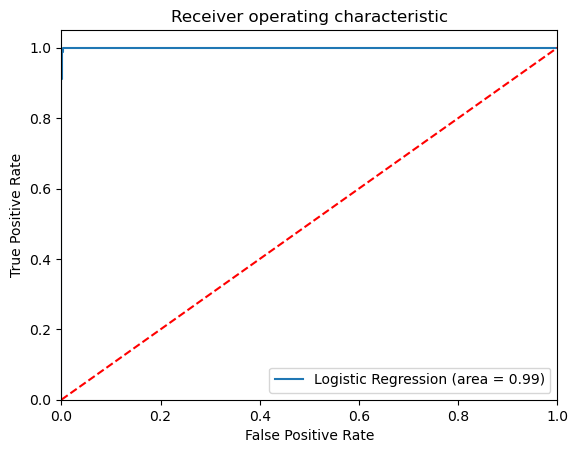

In [40]:
#import libraries to plot the probability of the graph curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#curve is another common tool used with binary classifiers
#the dotted line represents the ROC curve of a purely random classifier
#good classifier stays as far away from that line as possible (toward the top-left corner)
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [41]:
#import libraries for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

#make predictions and store data for later
y_pred_logreg = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_test,y_pred_logreg)*100,2)

C:\Users\windows 11\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
#import libraries to build the decision tree model and fit the model
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

#make predictions and store data for later
y_pred_dt = dt_classifier.predict(X_test)
acc_dt = round(accuracy_score(y_test,y_pred_dt)*100,2)

In [43]:
#import libraries for SVM
from sklearn.svm import SVC

svm_classifier = SVC(C=100,kernel='linear',gamma=1)     
svm_classifier.fit(X_train,y_train)

#make predictions and store data for later
y_pred_svm = svm_classifier.predict(X_test)
acc_svm = round(accuracy_score(y_test,y_pred_svm)*100,2)

In [44]:
#import libraries to build the Naive Bayes model and fit in the train data
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB() 
nb_classifier.fit(X_train, y_train)  

#make predictions and store data for later
y_pred_nb = nb_classifier.predict(X_test)  
acc_nb = round(accuracy_score(y_test,y_pred_nb)*100,2)

In [45]:
#display the accuracy results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 
              'Support Vector Machine', 'Naive Bayes'],
    'Score': [acc_logreg, acc_dt, acc_svm, acc_nb]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
100.00,Decision Tree
99.68,Support Vector Machine
99.48,Logistic Regression
92.68,Naive Bayes


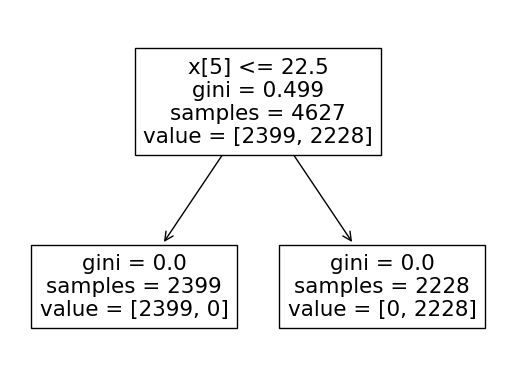

In [46]:
#import library to plot decision tree
import matplotlib.pyplot as plt
from sklearn import tree

tree.plot_tree(dt_classifier);  #display decision tree

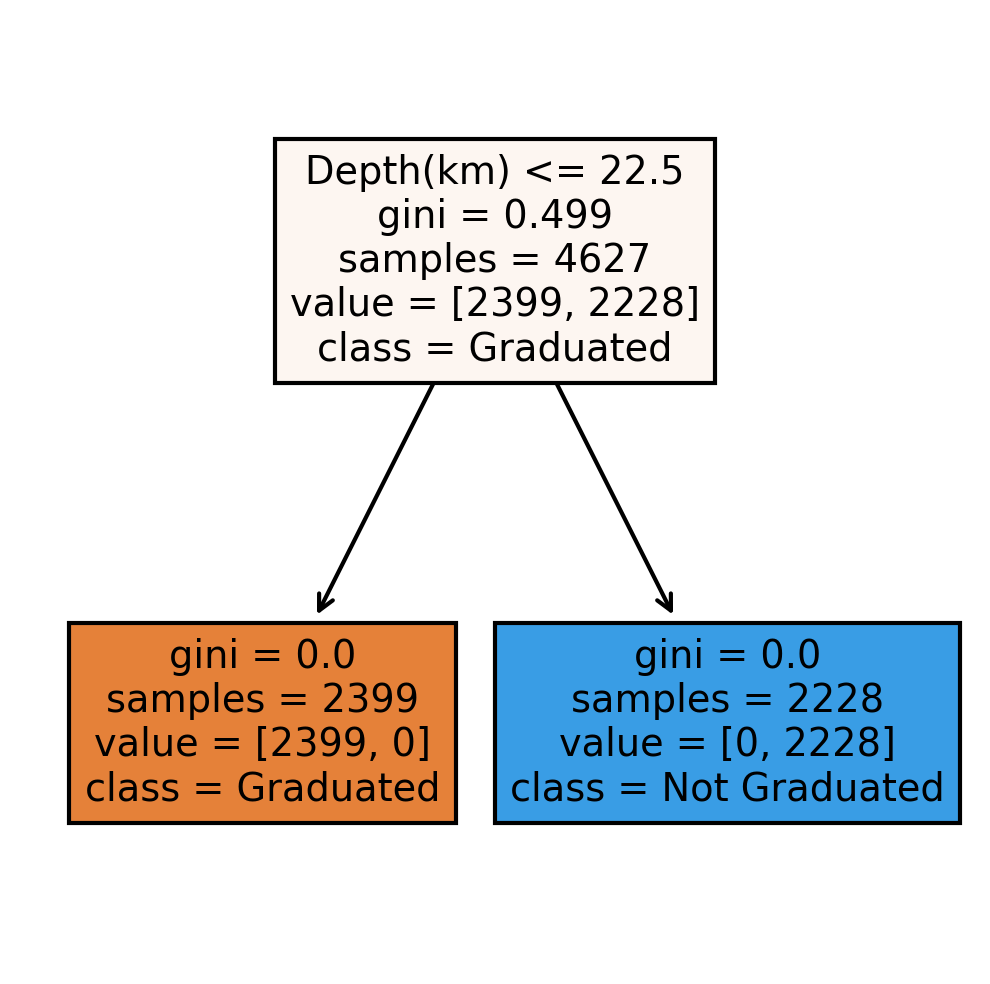

In [47]:
#add features and class name in the decision tree (dt_classifier)
fn= data.columns
cn=['Graduated','Not Graduated']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(dt_classifier, feature_names = fn, class_names=cn,filled = True);

fig.savefig('dt_classifier_image.png')

In [55]:
#import libraries for confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm) 
  
print ("Confusion Matrix : \n", cm)  #display the confusion matrix

Confusion Matrix : 
 [[804   4]
 [  1 734]]


<Axes: xlabel='Predicted Values', ylabel='Actual Values'>

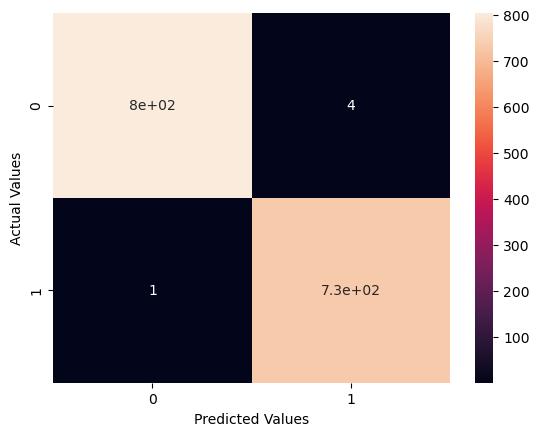

In [56]:
import seaborn as sns  #import package for plotting
#visualize the confusion matrix
cm = pd.crosstab(y_test, y_pred_svm, rownames=['Actual Values'], colnames=['Predicted Values'])
sns.heatmap(cm, annot=True)